In [1]:
from utils import  plot_comp_invivo_multi
from dataset import read_data_invivo
import torch
from model import UnetModel
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
# init the classification model
input_size = (64, 64)
spatial_dims = 2 
num_channels = 40 #metabolies*tpts

model = UnetModel.load_from_checkpoint("/home/ssahin/kpl-est-dl/checkpoints/version_20/epoch=213-val_loss=2.23.ckpt", input_size=input_size, spatial_dims=spatial_dims, num_channels=num_channels, dropout=0.3)
model.eval()

model1 = UnetModel.load_from_checkpoint("/home/ssahin/kpl-est-dl/checkpoints/version_21/epoch=299-val_loss=7.63.ckpt", input_size=input_size, spatial_dims=spatial_dims, num_channels=num_channels, dropout=0.3)
model1.eval()

model2 = UnetModel.load_from_checkpoint("/home/ssahin/kpl-est-dl/checkpoints/version_21/epoch=1199-val_loss=4.85.ckpt", input_size=input_size, spatial_dims=spatial_dims, num_channels=num_channels, dropout=0.3)
model2.eval()

model3 = UnetModel.load_from_checkpoint("/home/ssahin/kpl-est-dl/checkpoints/version_21/epoch=2999-val_loss=3.66.ckpt", input_size=input_size, spatial_dims=spatial_dims, num_channels=num_channels, dropout=0.3)
model3.eval()

BasicUNet features: (32, 32, 64, 128, 256, 32).
BasicUNet features: (32, 32, 64, 128, 256, 32).
BasicUNet features: (32, 32, 64, 128, 256, 32).
BasicUNet features: (32, 32, 64, 128, 256, 32).


UnetModel(
  (model): BasicUNet(
    (conv_0): TwoConv(
      (conv_0): Convolution(
        (conv): Conv2d(40, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (adn): ADN(
          (N): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (D): Dropout(p=0.3, inplace=False)
          (A): LeakyReLU(negative_slope=0.1, inplace=True)
        )
      )
      (conv_1): Convolution(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (adn): ADN(
          (N): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (D): Dropout(p=0.3, inplace=False)
          (A): LeakyReLU(negative_slope=0.1, inplace=True)
        )
      )
    )
    (down_1): Down(
      (max_pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (convs): TwoConv(
        (conv_0): Convolution(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1,

### run comp for invivo case with comparison for fine tuning

In [3]:
data_path_test = "/data/ssahin/kpl_dl_sim/brainweb_9_2/invivo_test/"
list_val = glob.glob(data_path_test + '/*.h5')
#data_path_test = "/data/ssahin/kpl_dl_sim/brainweb_6_24/invivo_test/11_3_4.h5"
print(list_val[10])
dict = read_data_invivo(list_val[10]) #54, 20


/data/ssahin/kpl_dl_sim/brainweb_9_2/invivo_test/10_6_5.h5


In [4]:
x = torch.from_numpy(dict["data"])
x = x[None, :, :, :]

with torch.no_grad():
    kpl_pred = model(x)
kpl_pred_np_model = np.squeeze(kpl_pred.numpy())

with torch.no_grad():
    kpl_pred = model1(x)
kpl_pred_np_model1 = np.squeeze(kpl_pred.numpy())

with torch.no_grad():
    kpl_pred = model2(x)
kpl_pred_np_model2 = np.squeeze(kpl_pred.numpy())

with torch.no_grad():
    kpl_pred = model3(x)
kpl_pred_np_model3 = np.squeeze(kpl_pred.numpy())

In [5]:
plt.rcParams.update({'font.size': 20})

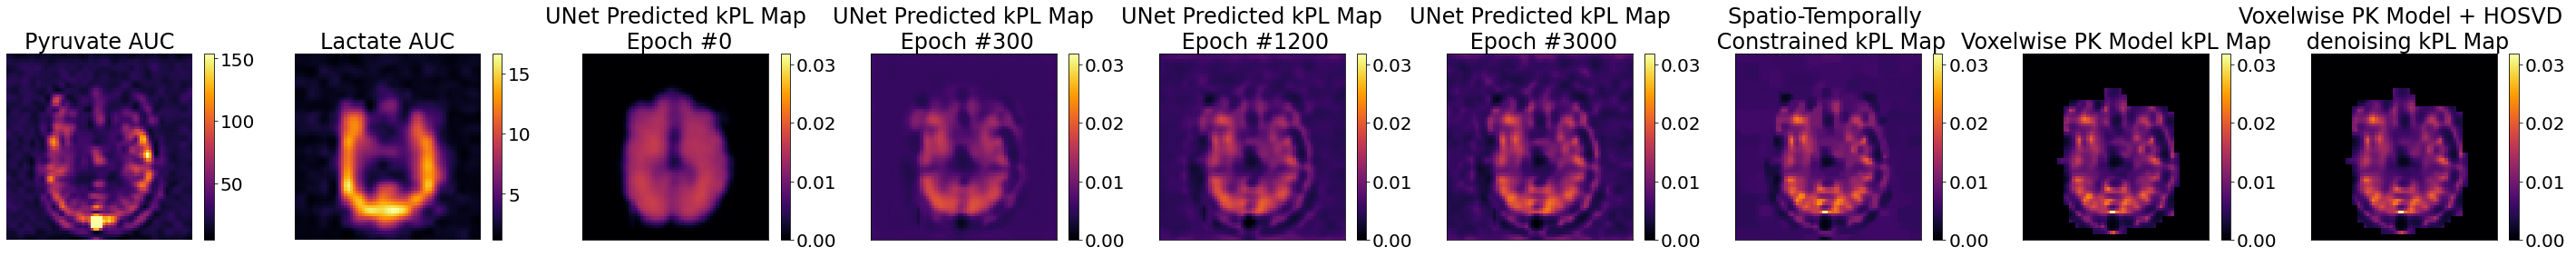

In [6]:
plot_comp_invivo_multi(dict["data"], [kpl_pred_np_model, kpl_pred_np_model1, kpl_pred_np_model2, kpl_pred_np_model3], dict["kPL_const"], dict["kPL_PK"], dict["kPL_denoise_PK"], dict["mask"], epoch_num=[0,300,1200,3000])

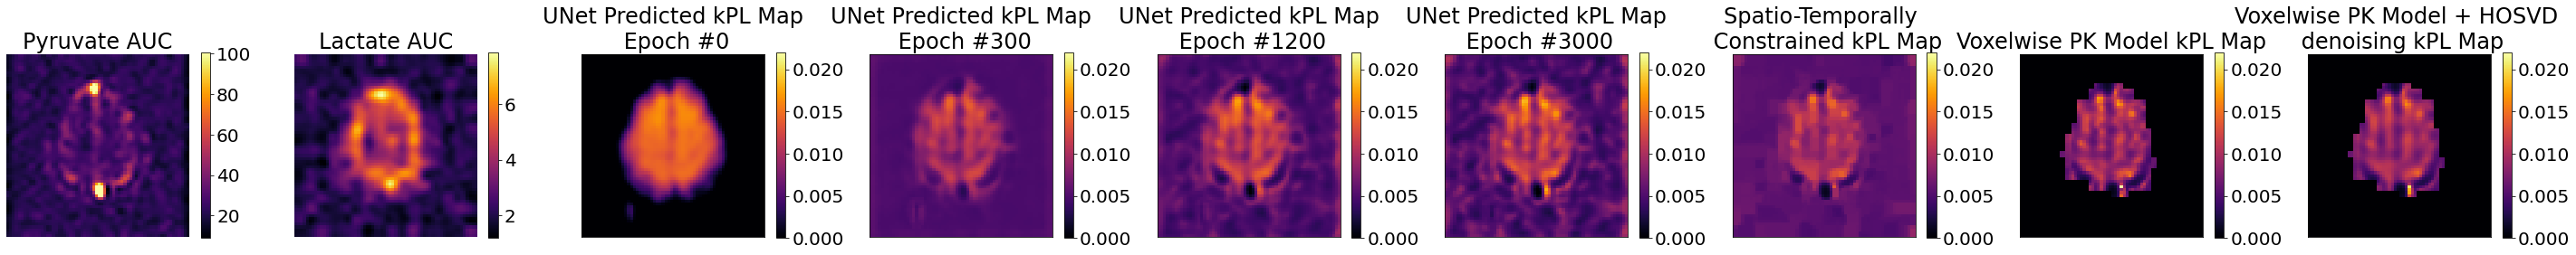

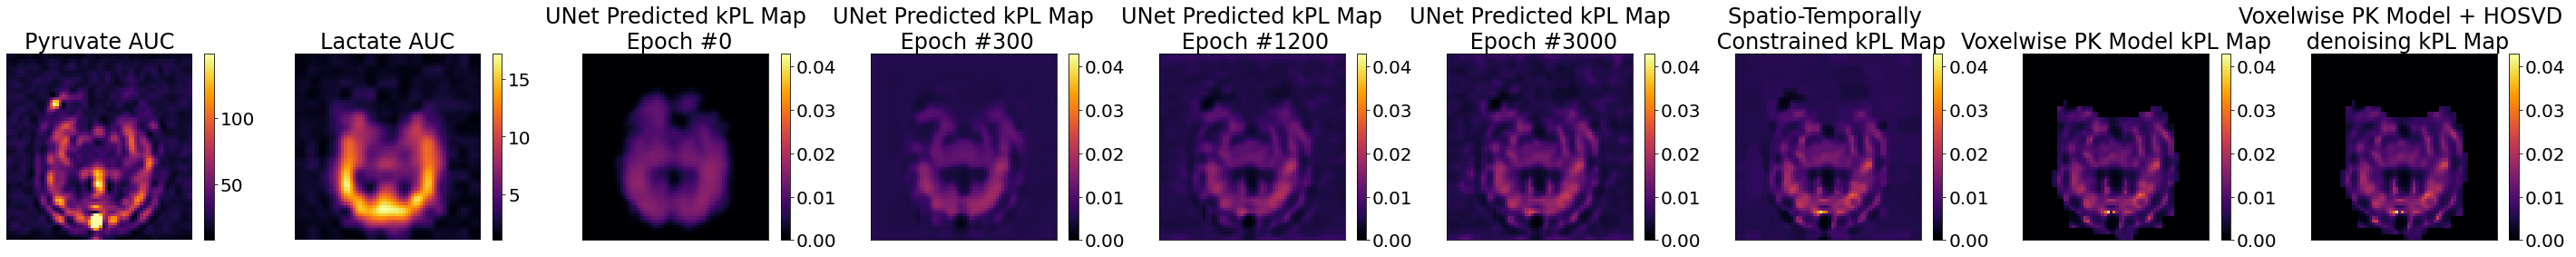

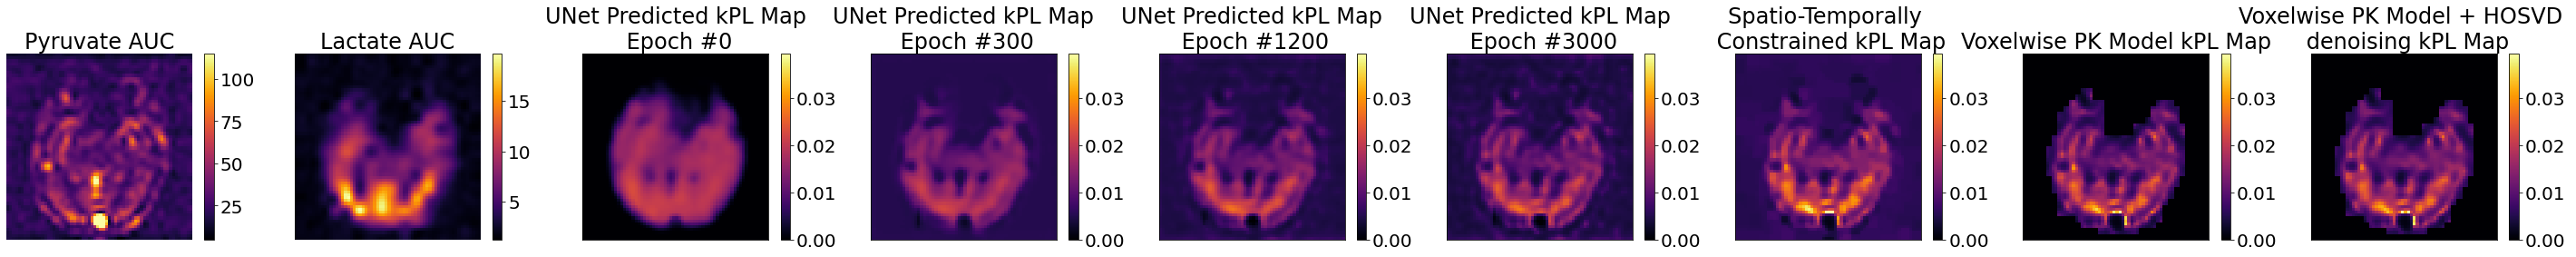

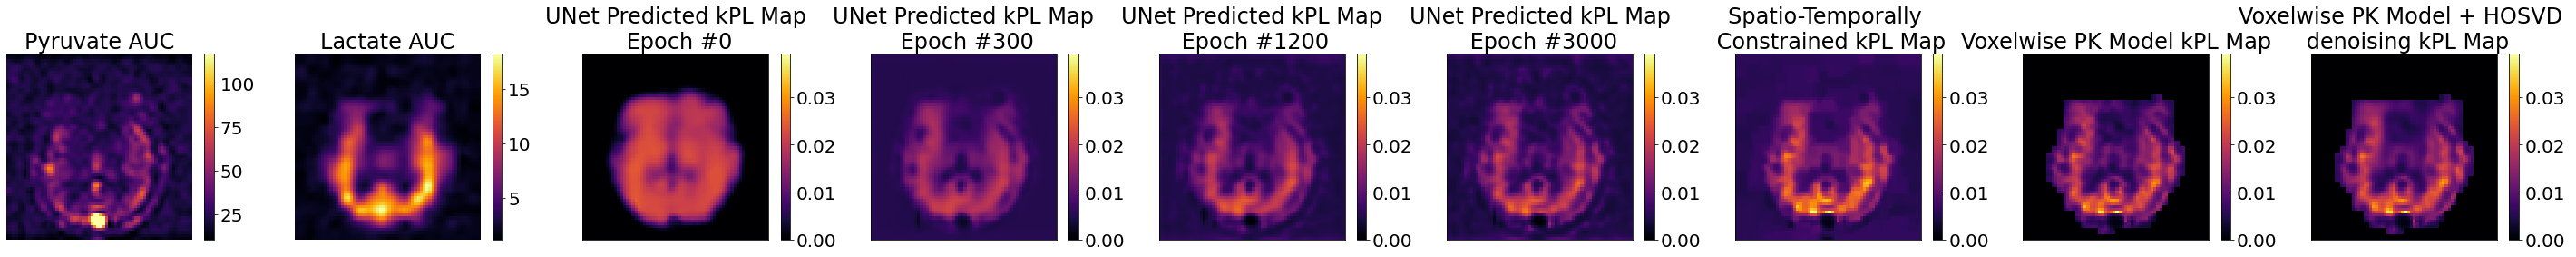

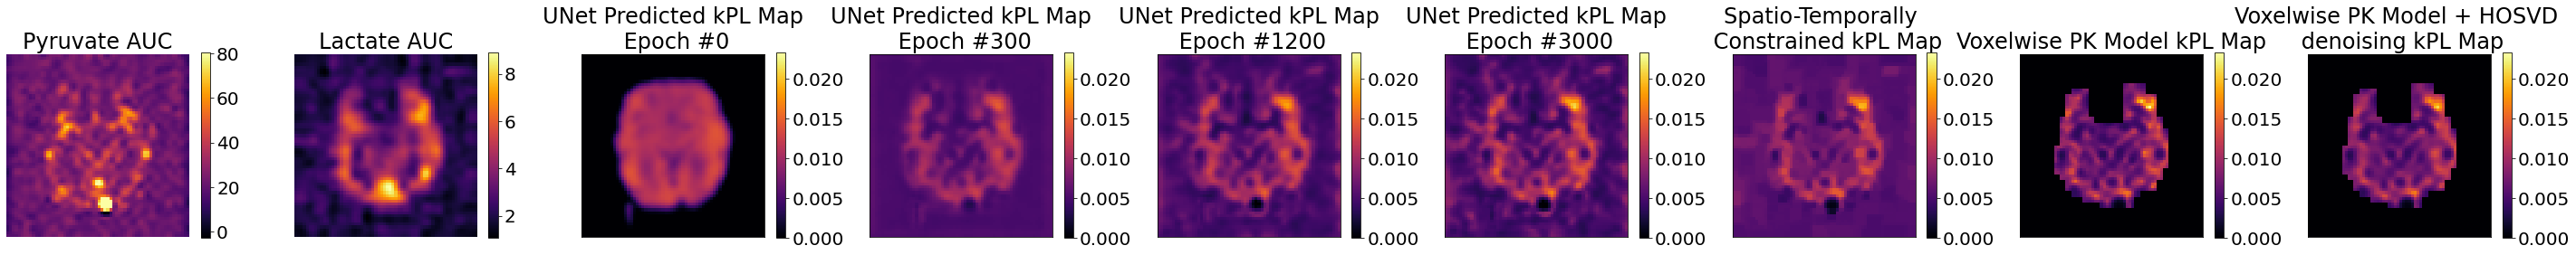

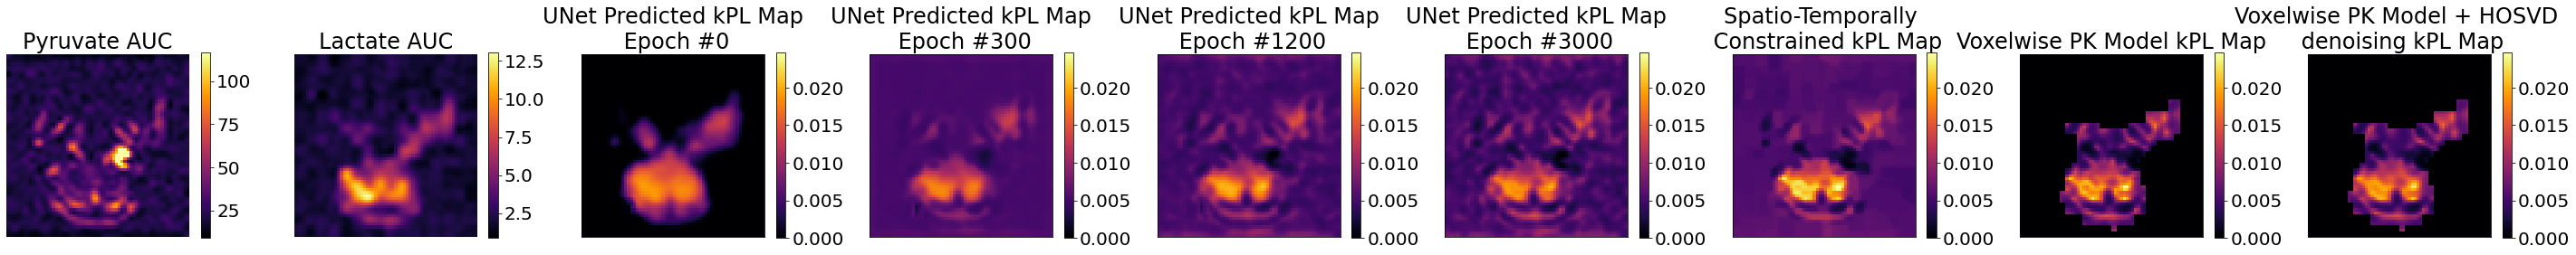

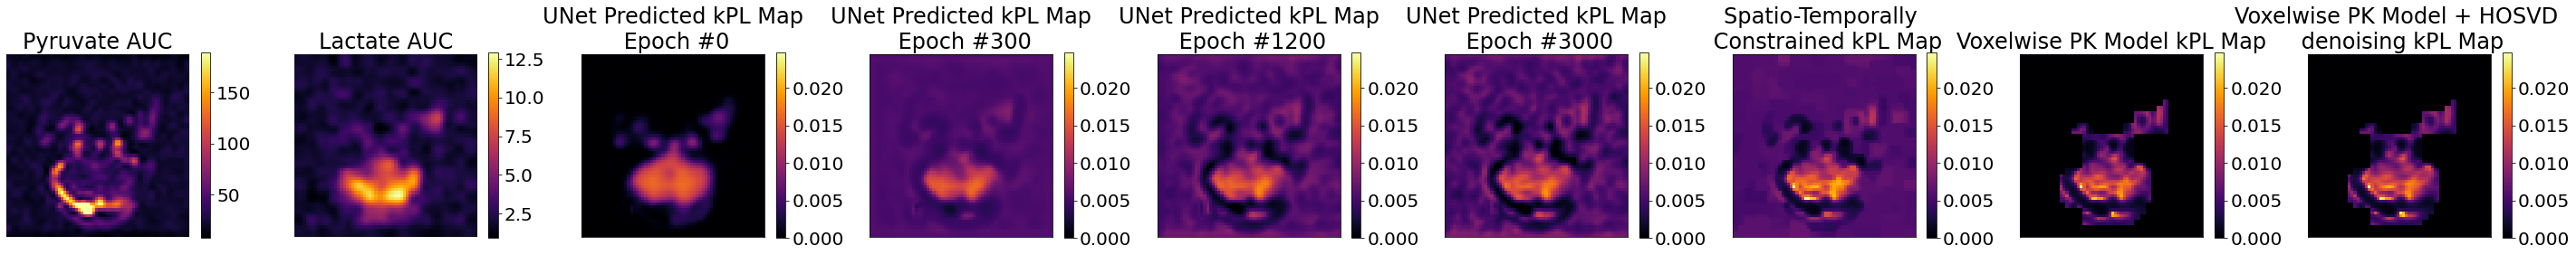

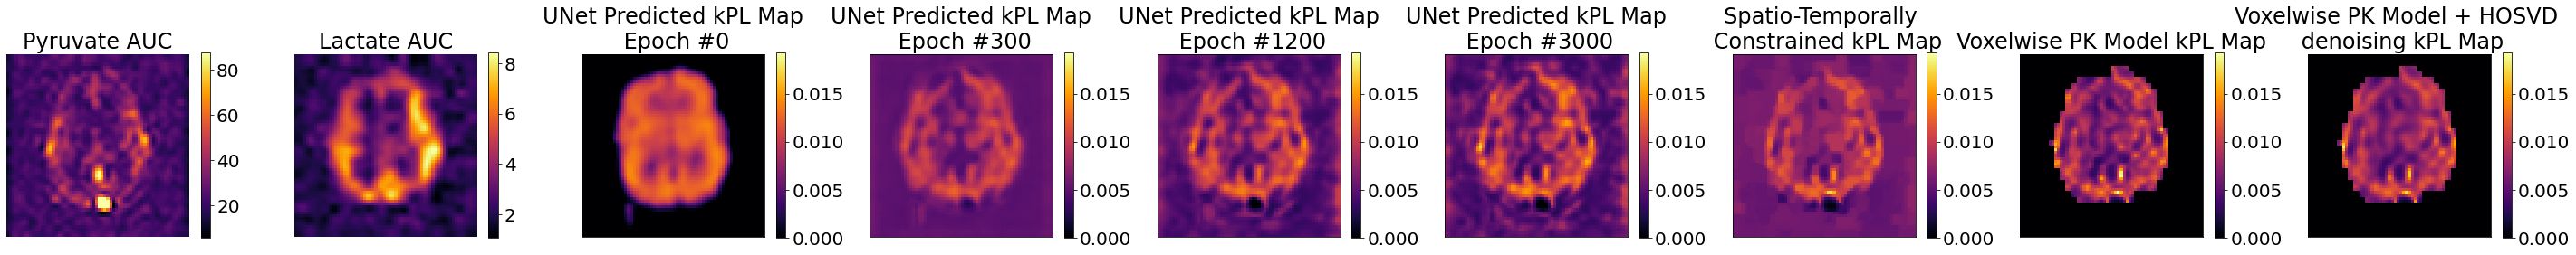

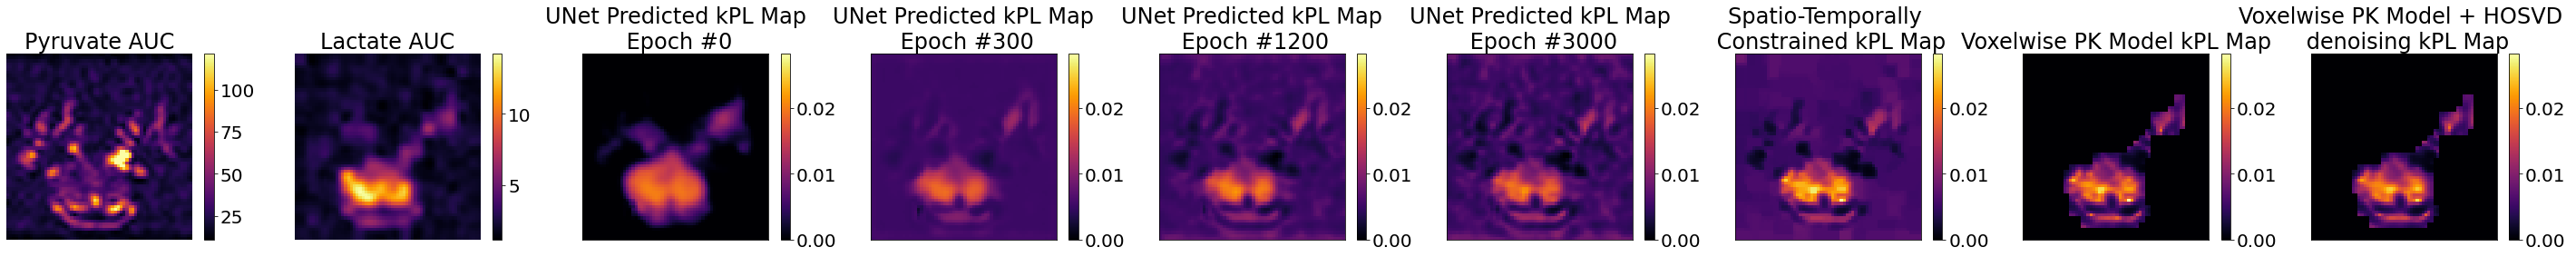

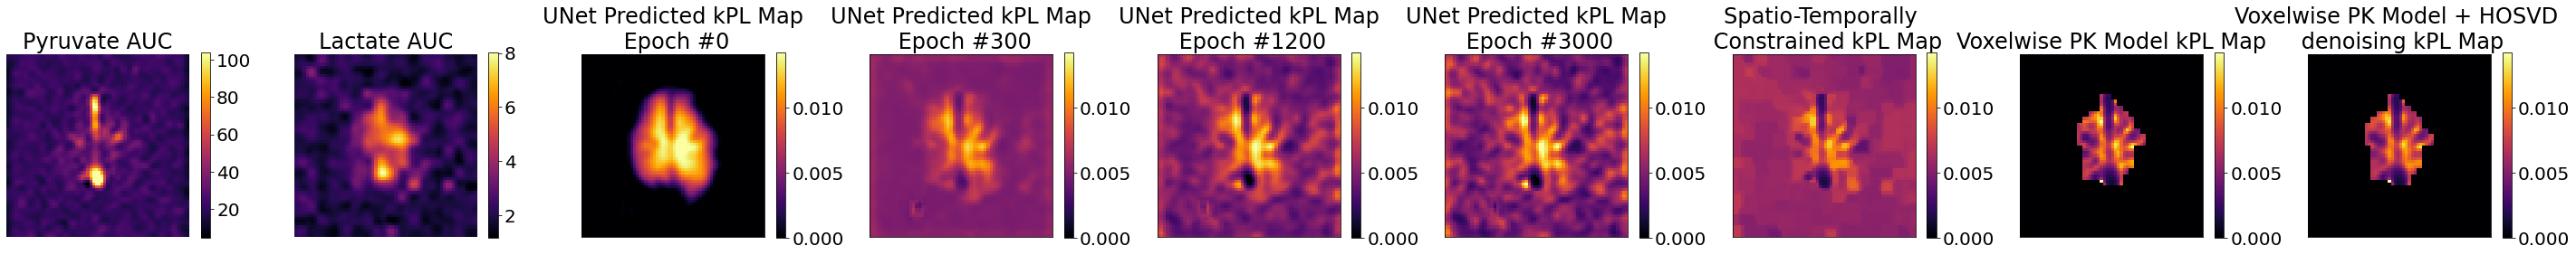

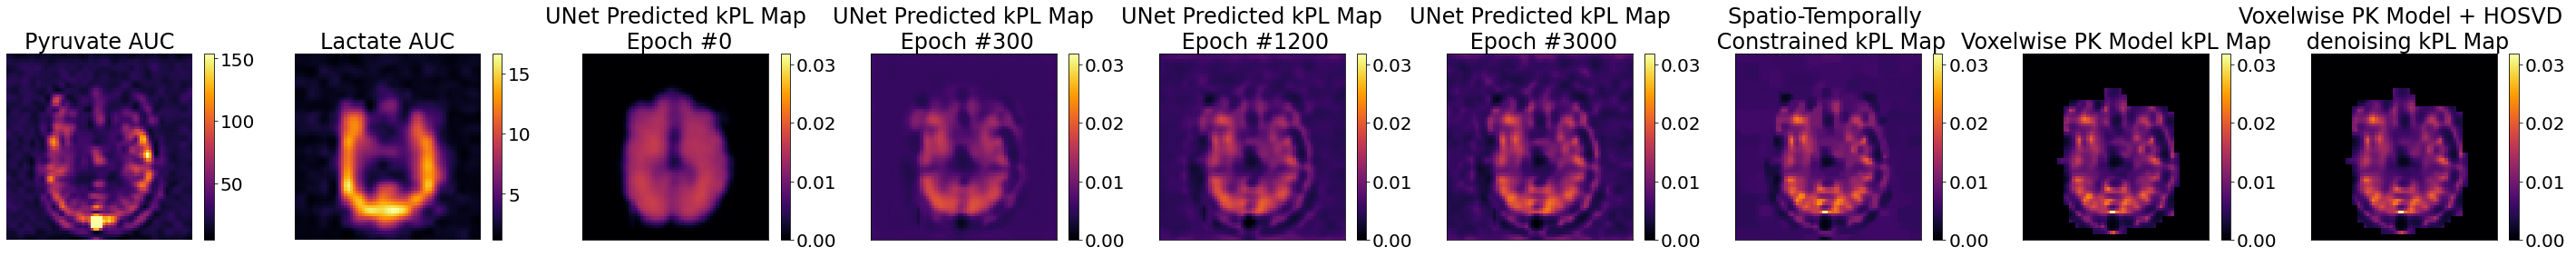

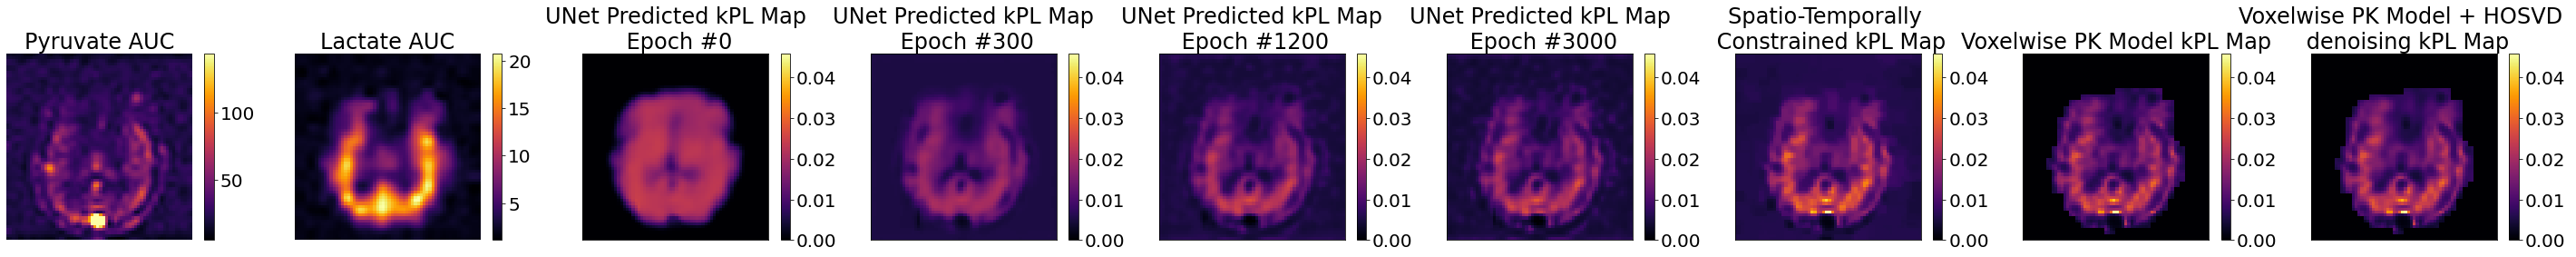

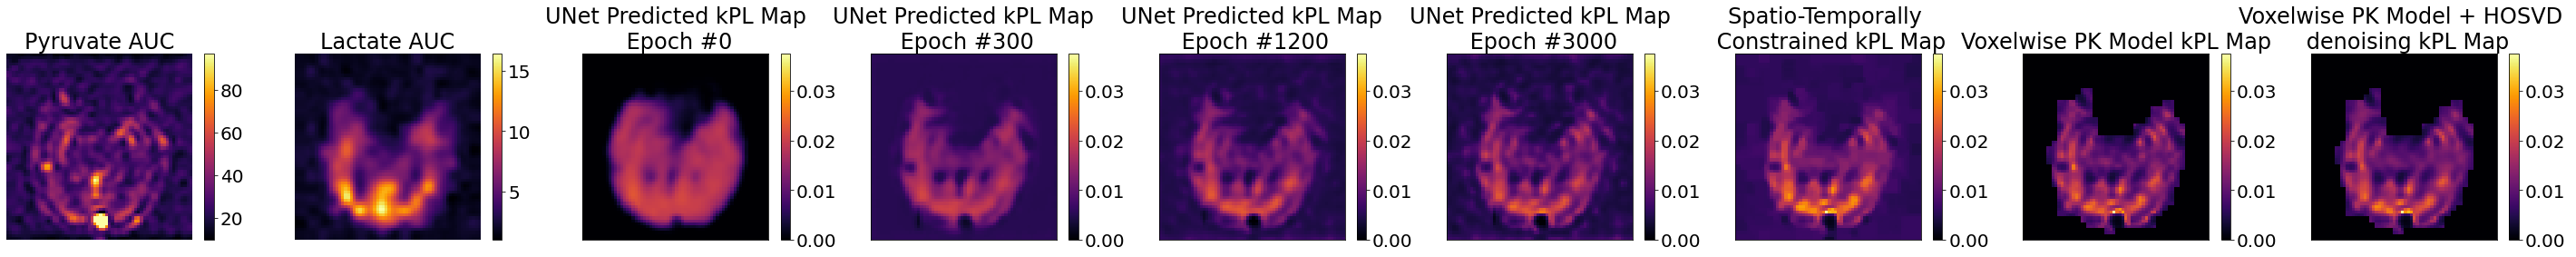

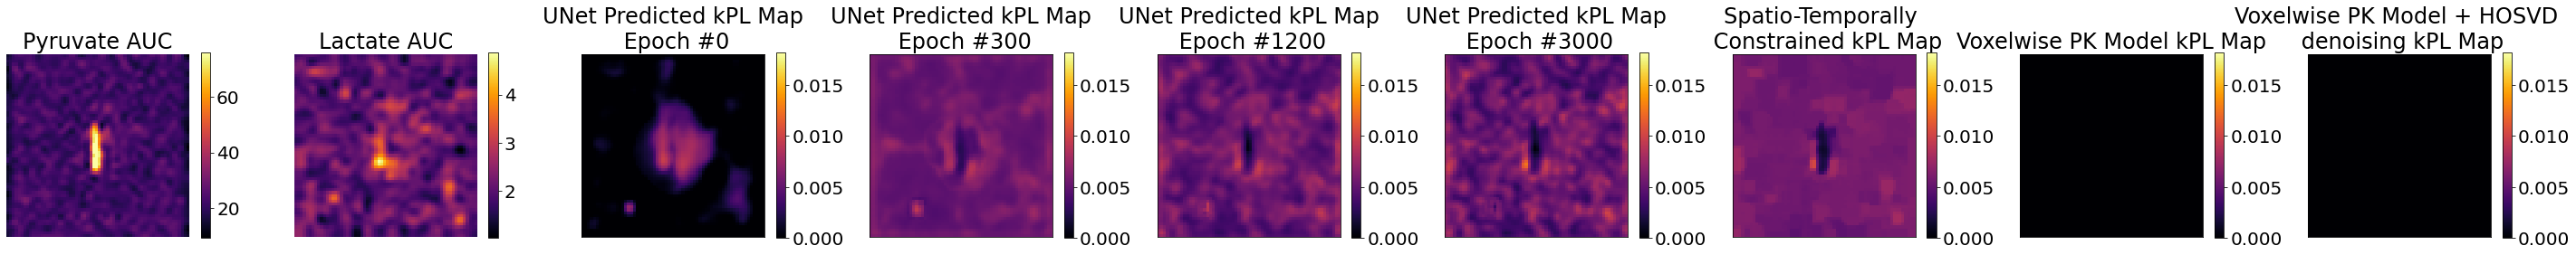

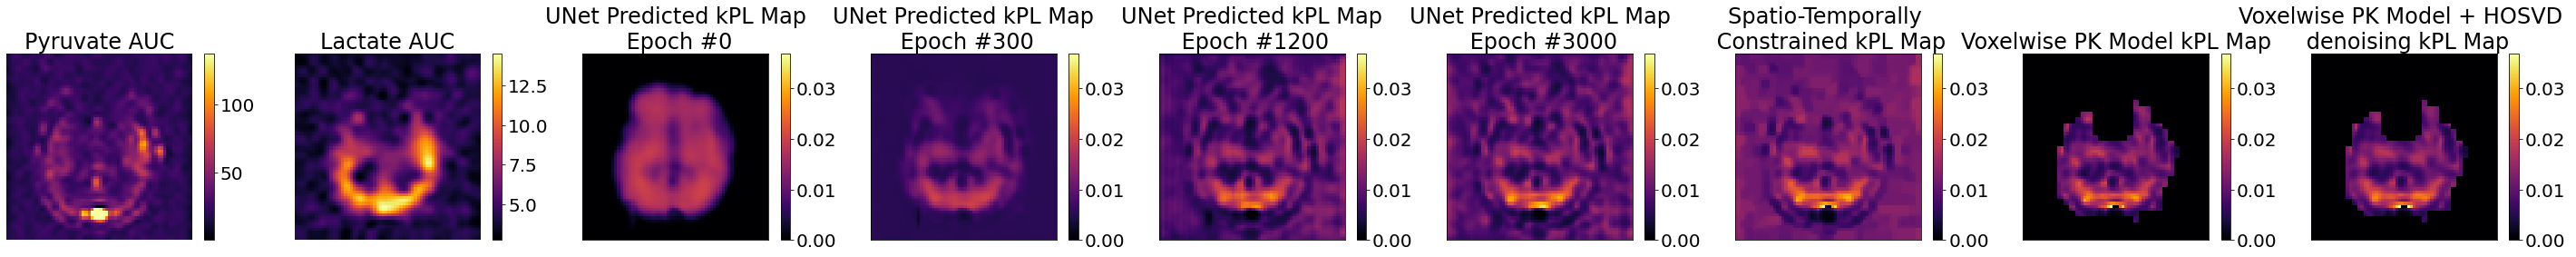

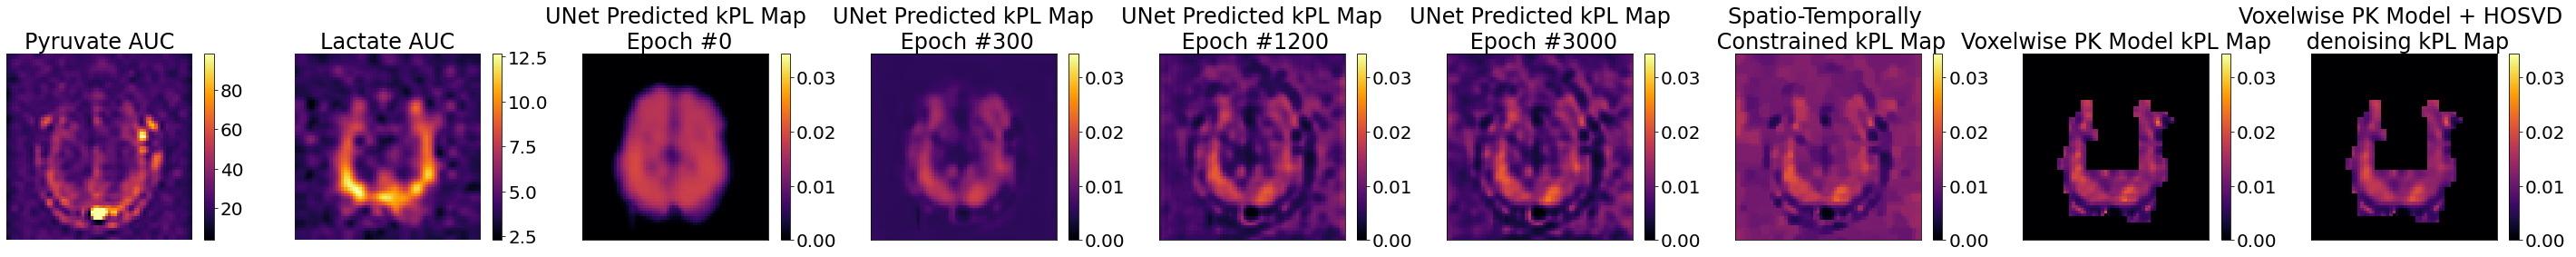

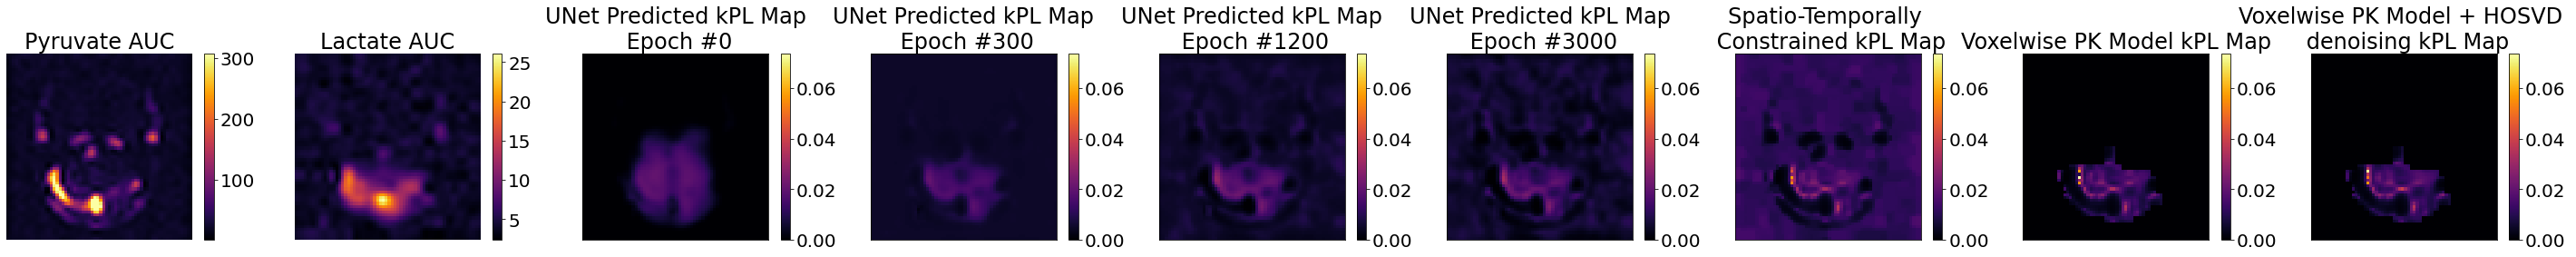

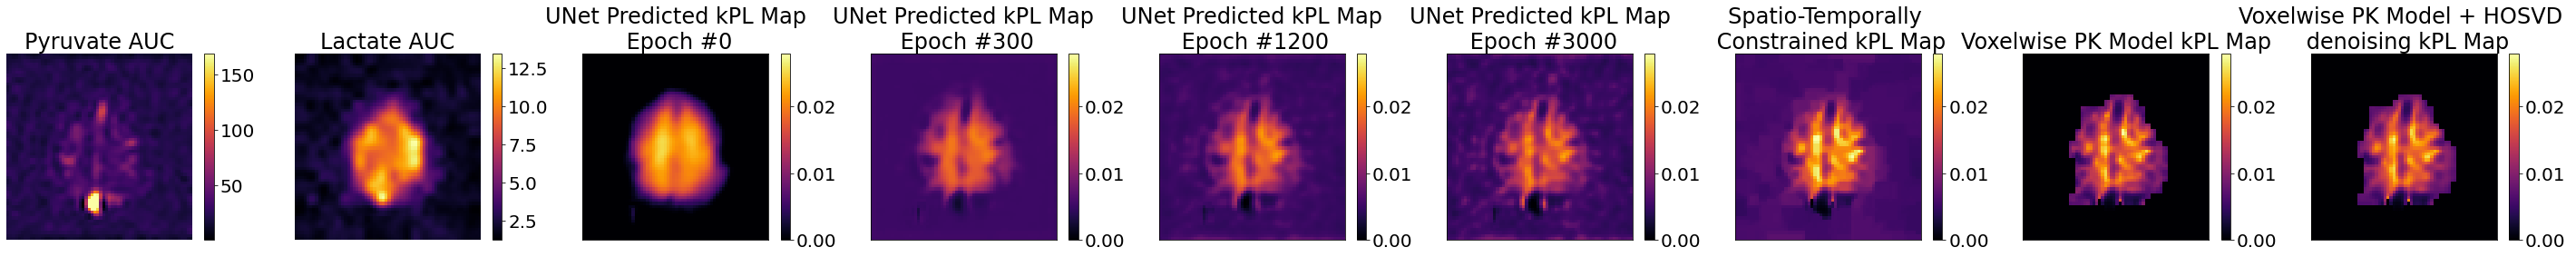

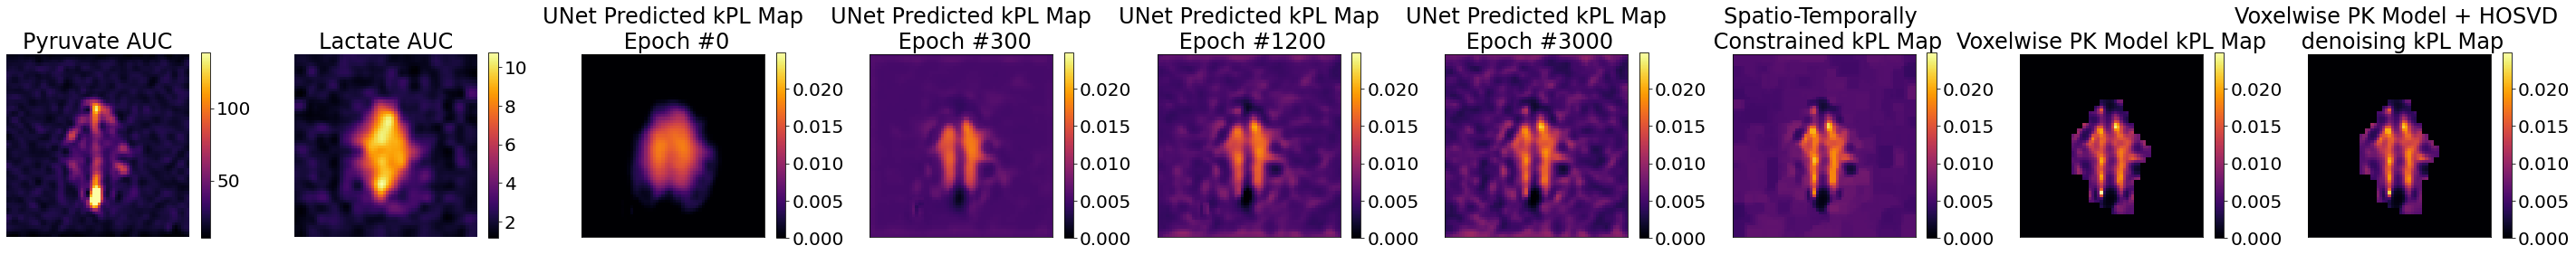

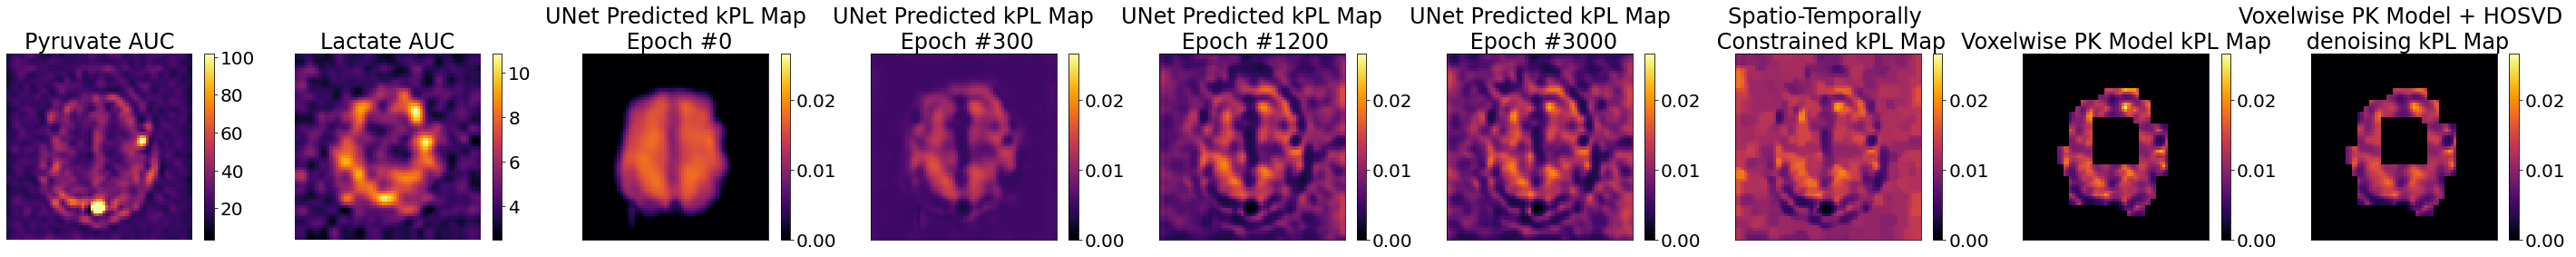

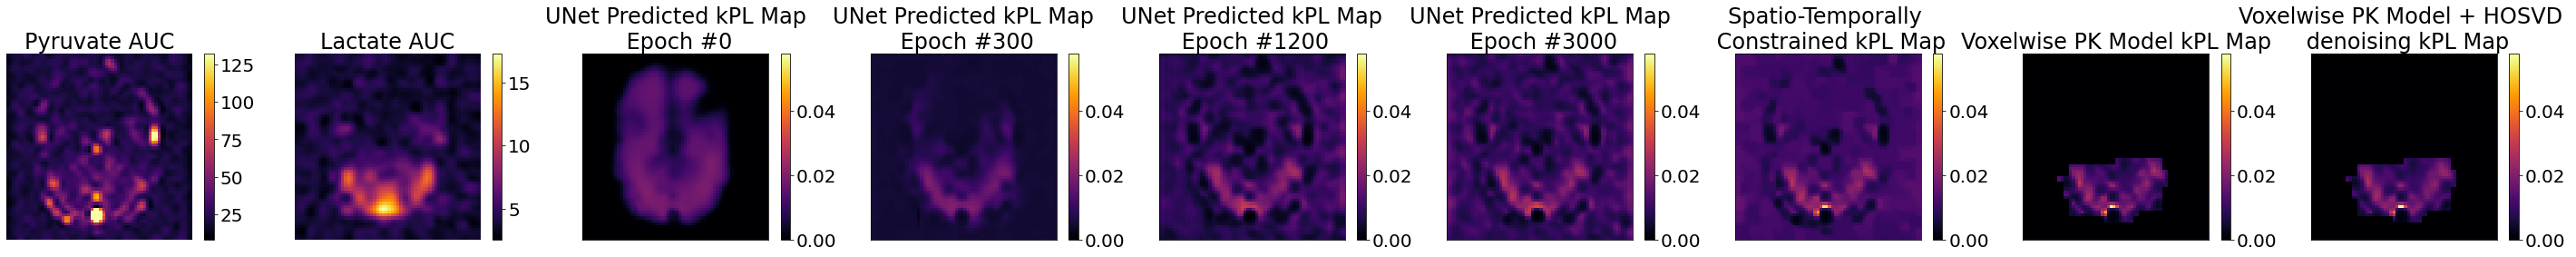

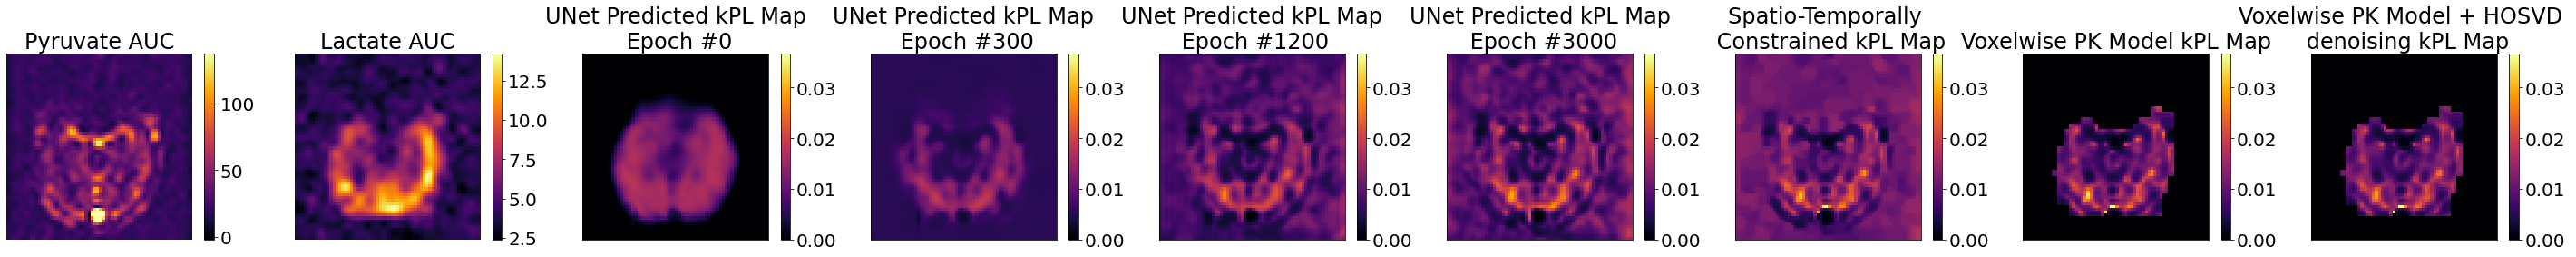

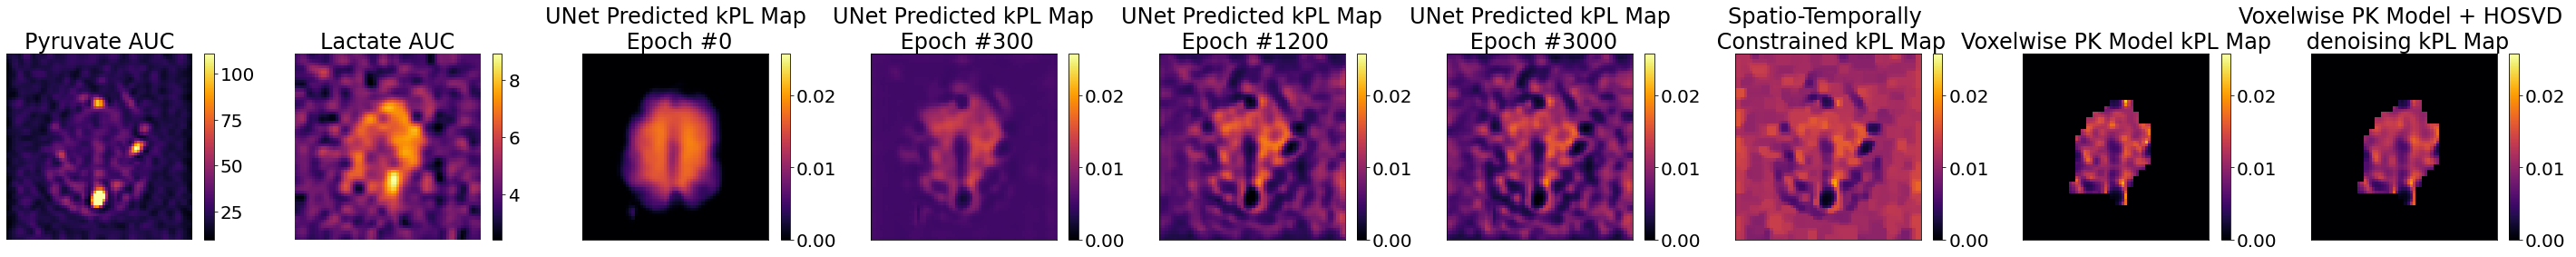

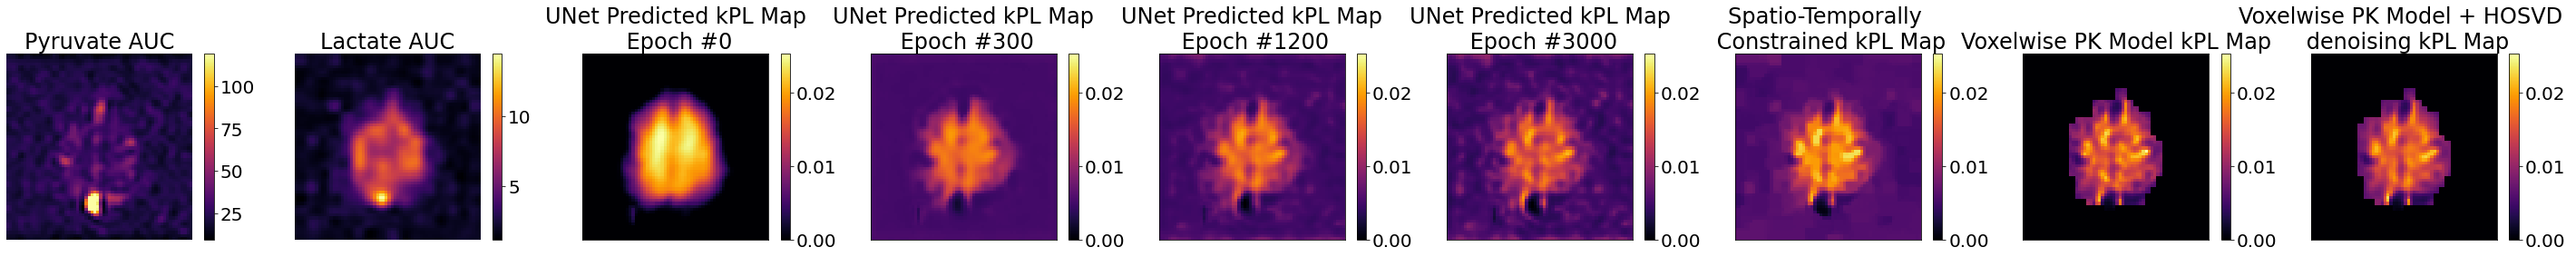

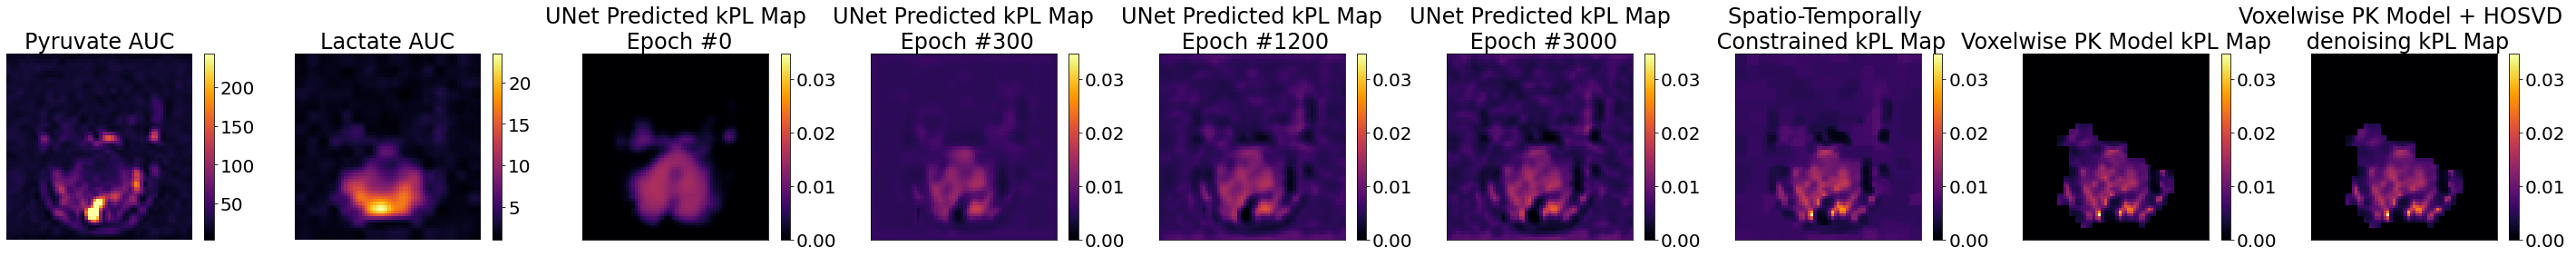

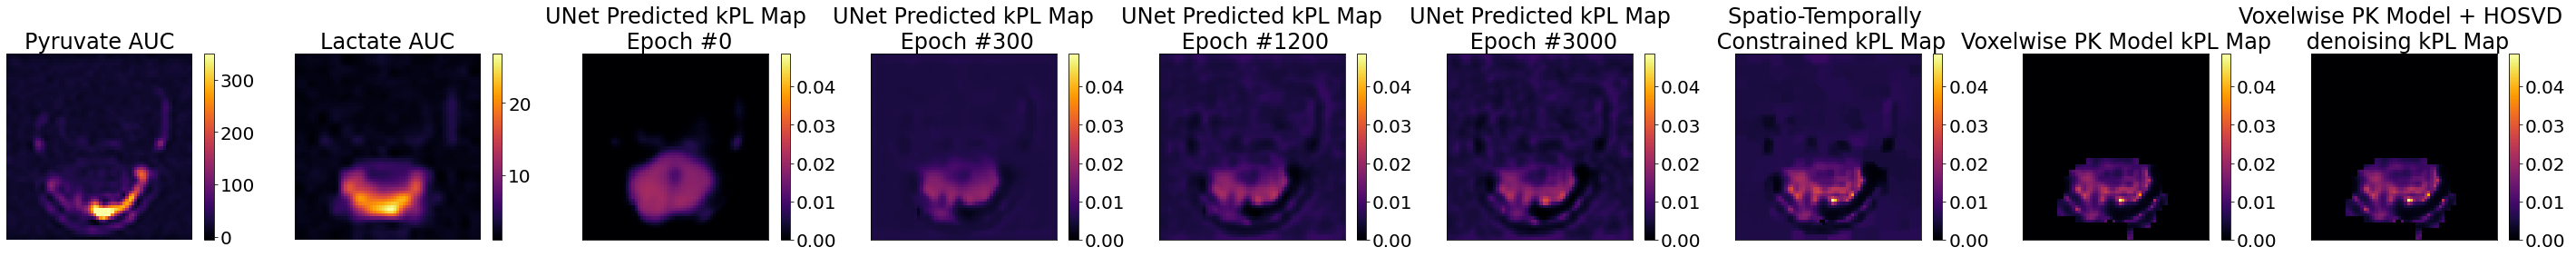

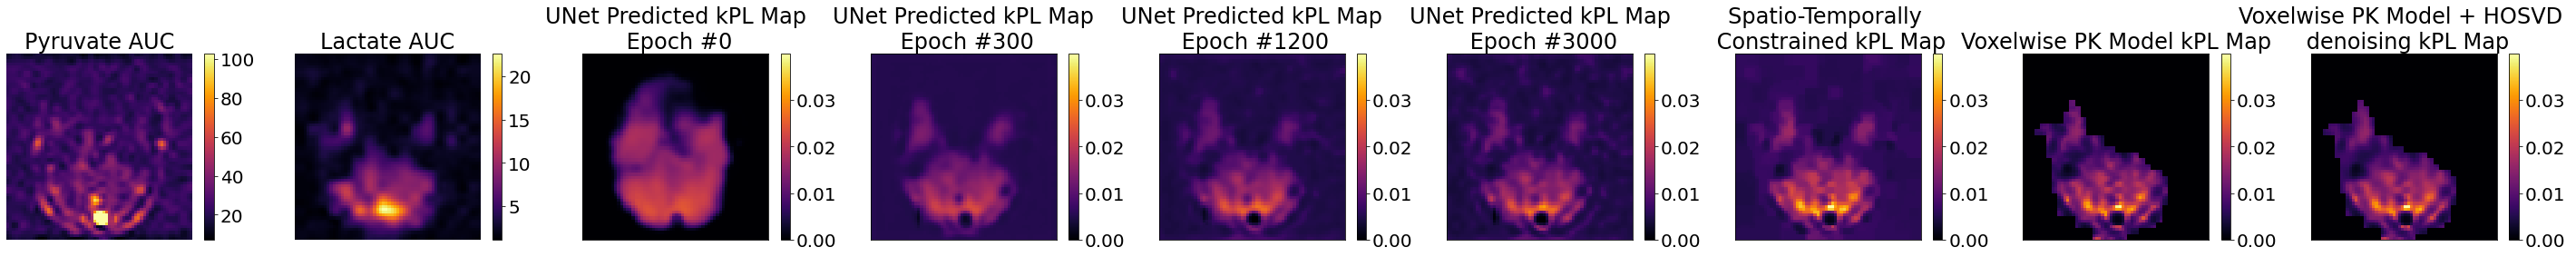

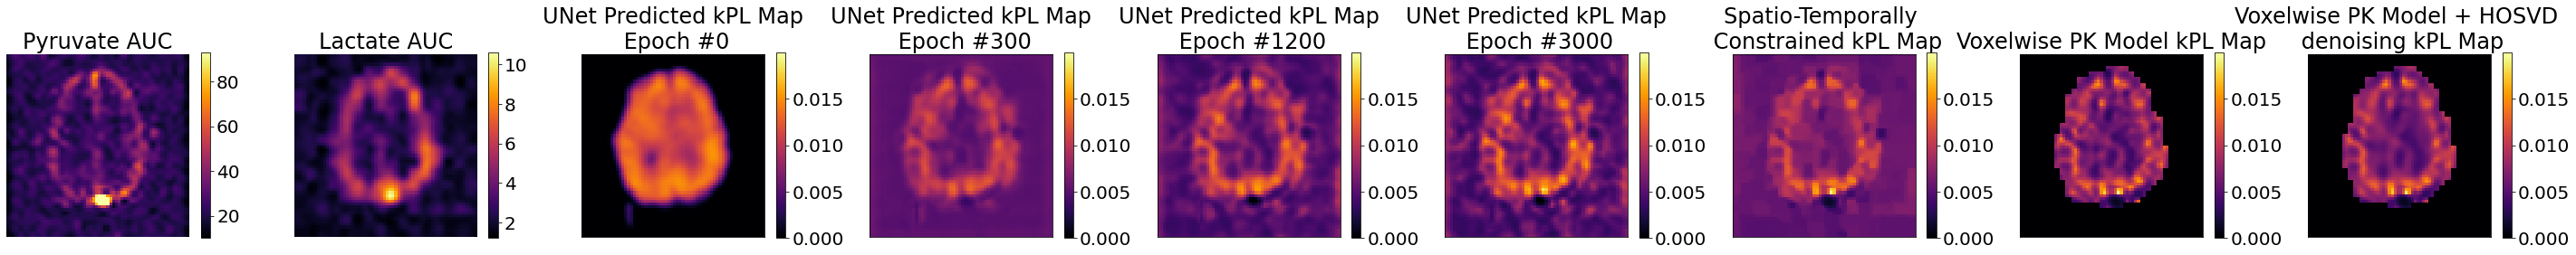

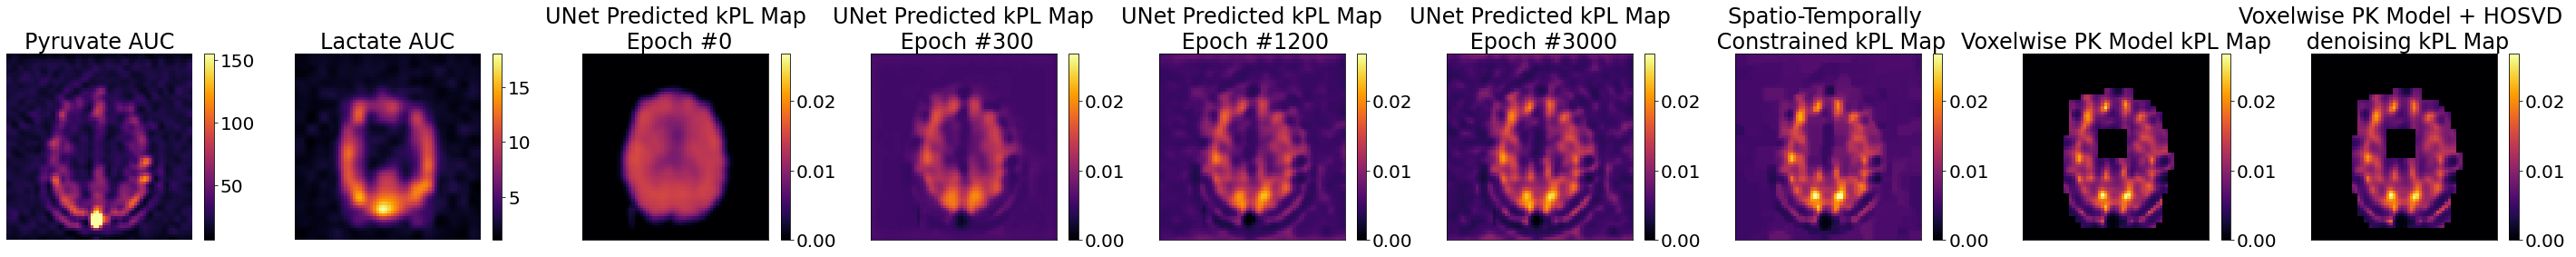

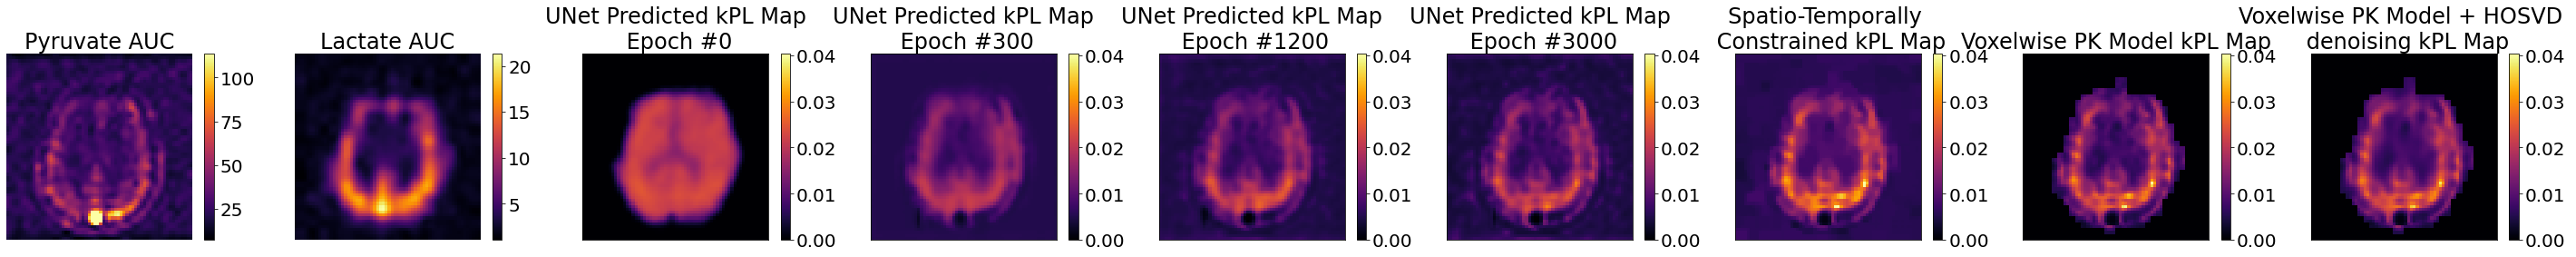

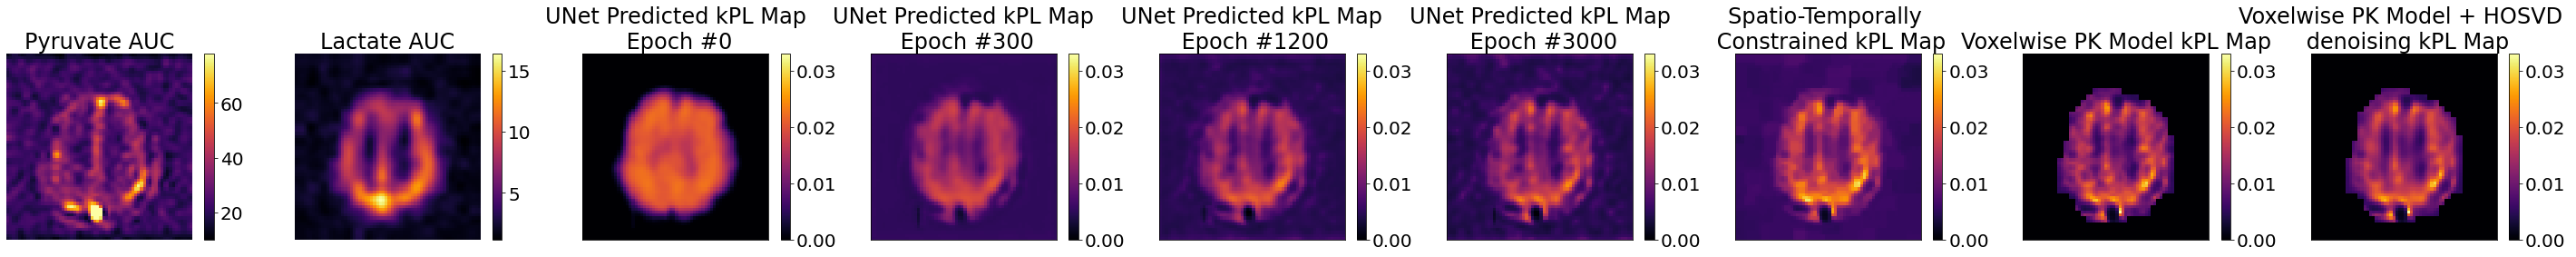

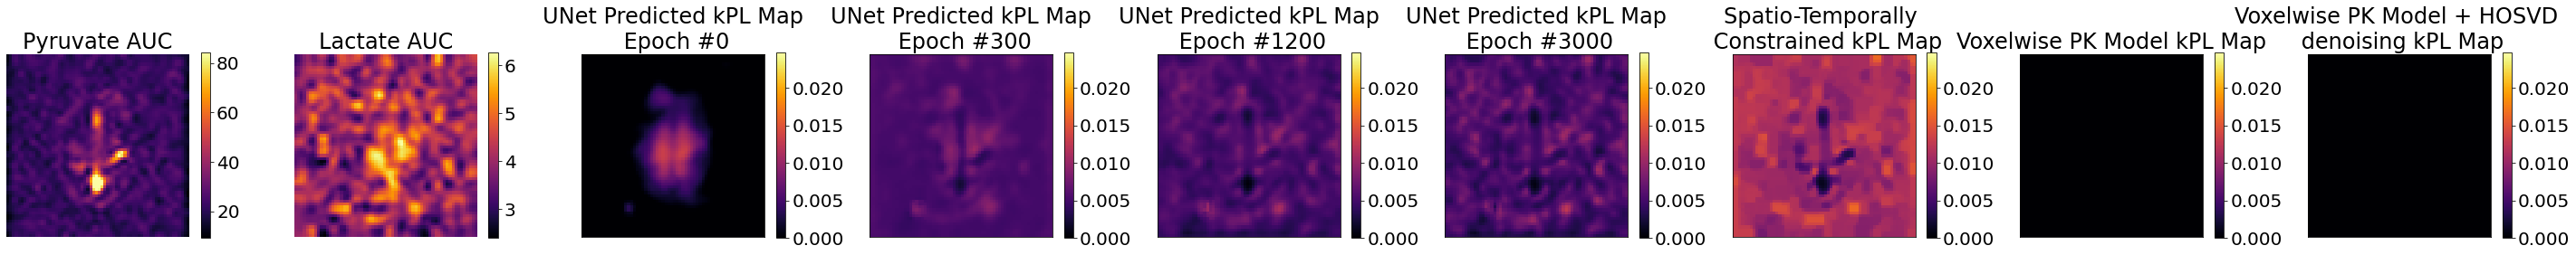

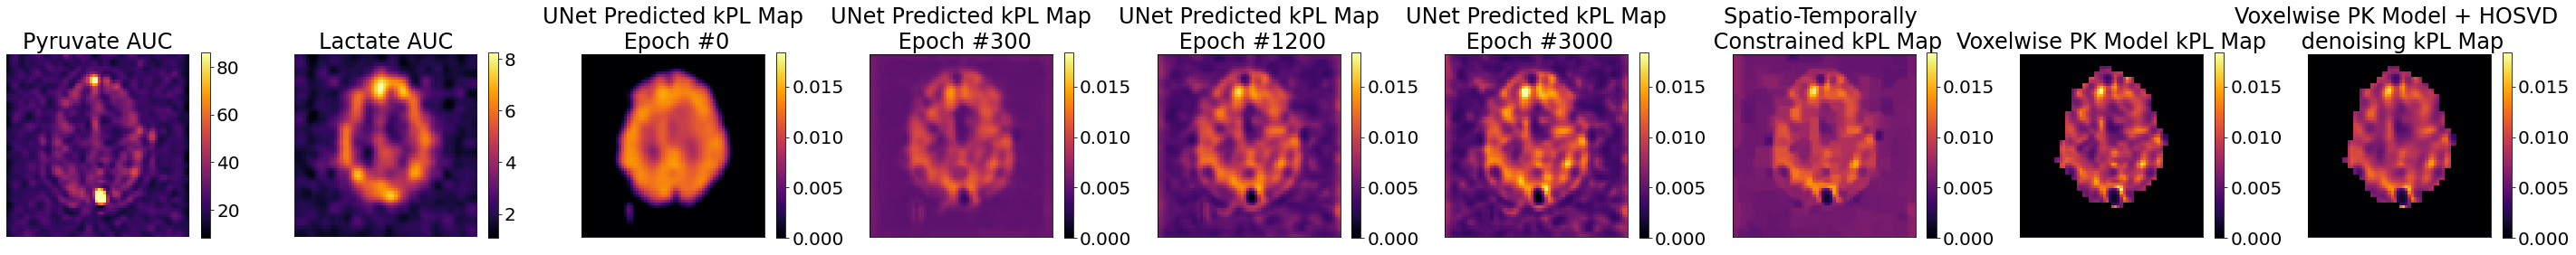

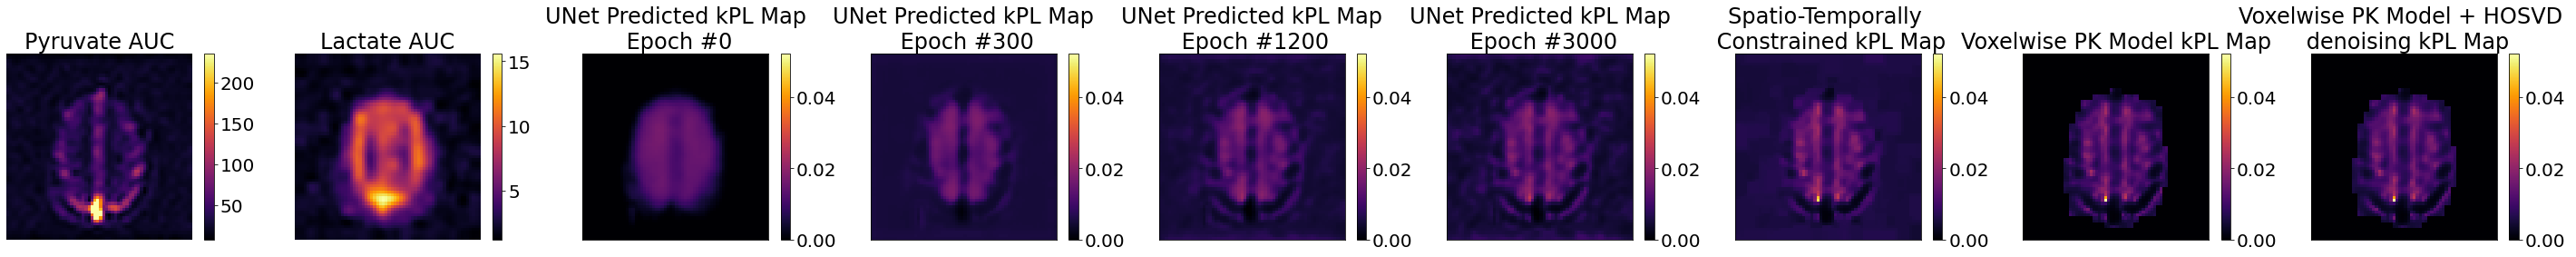

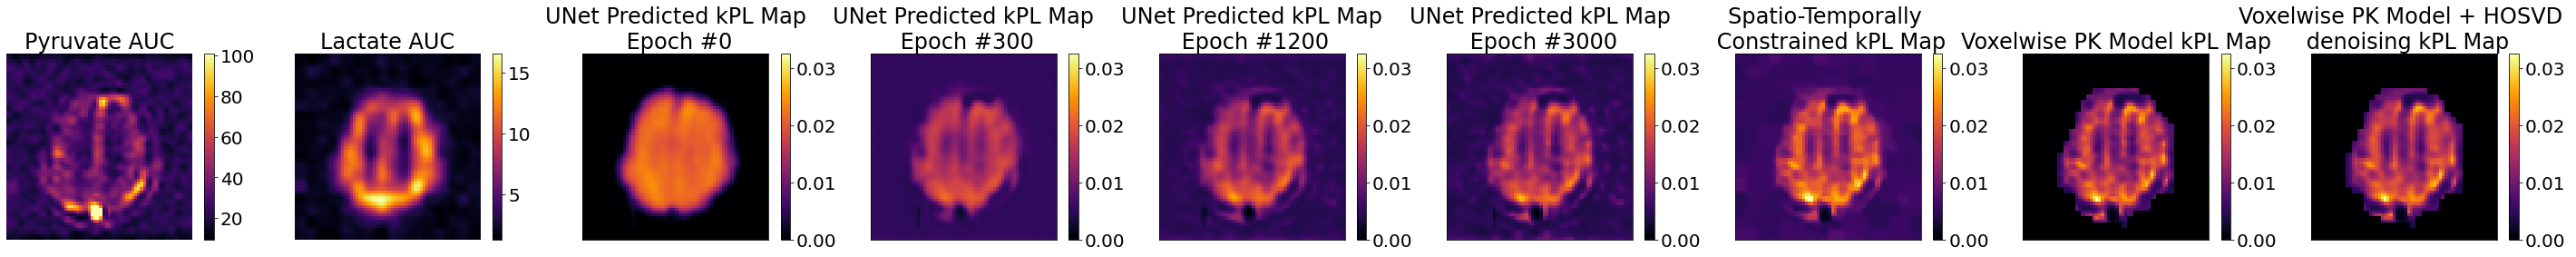

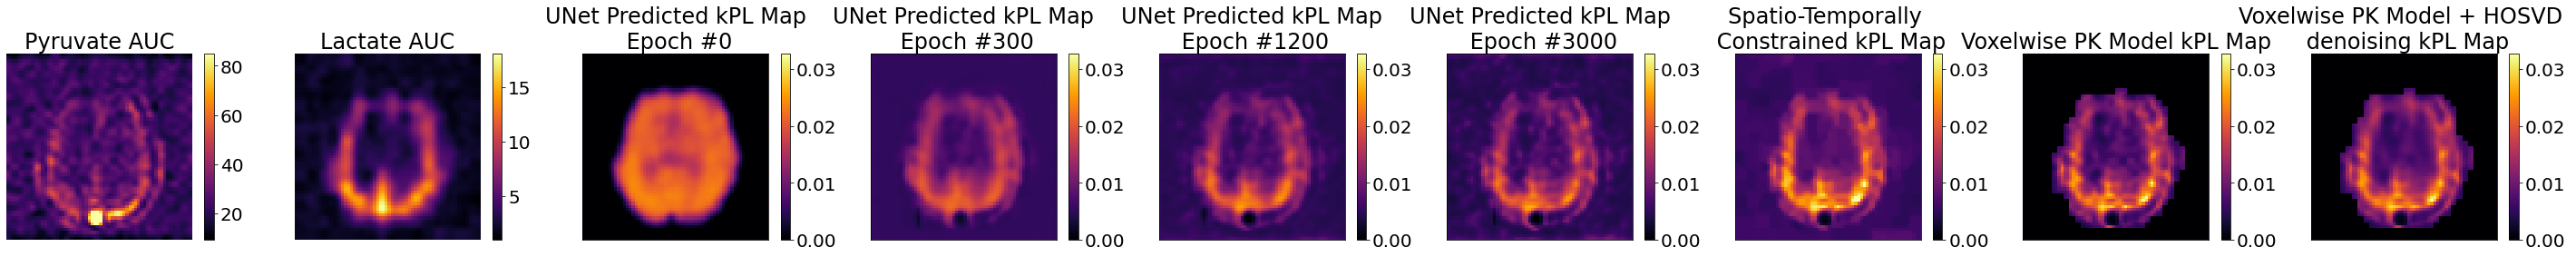

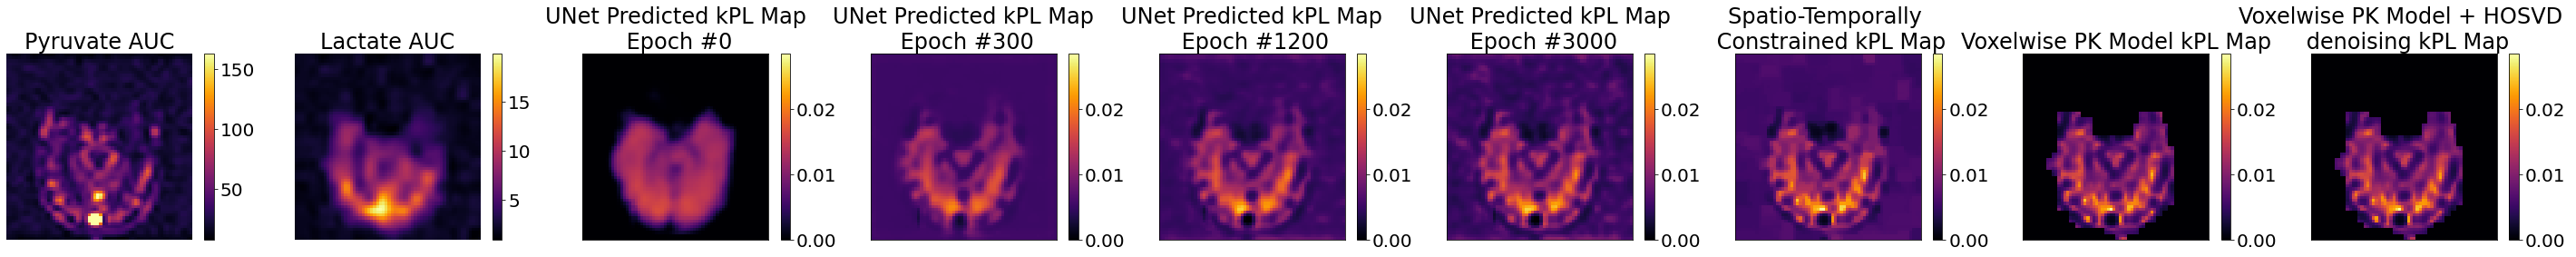

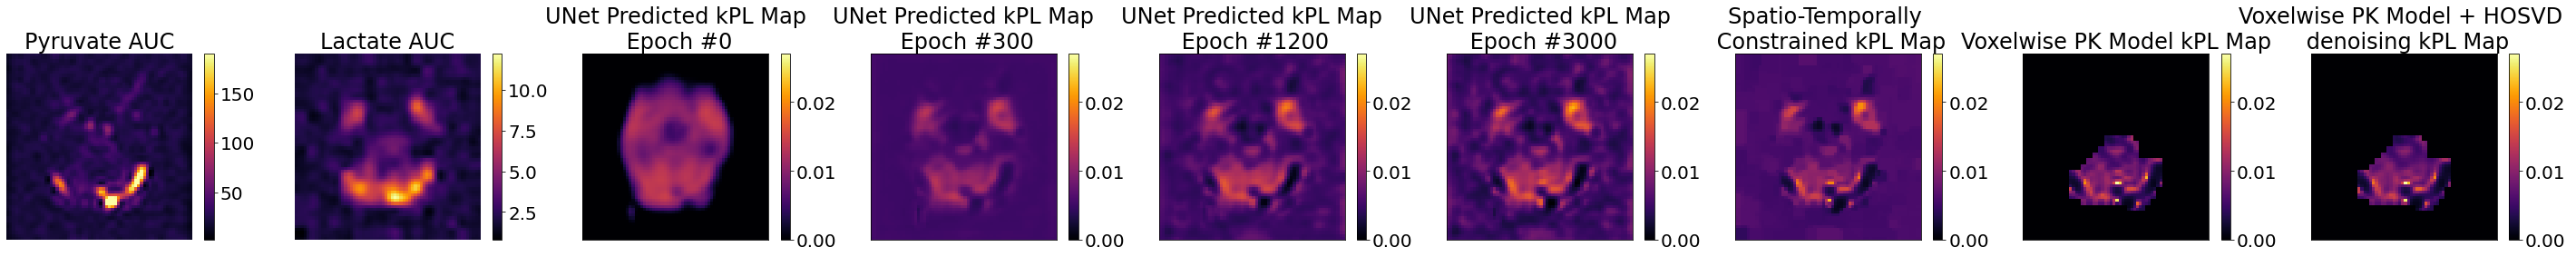

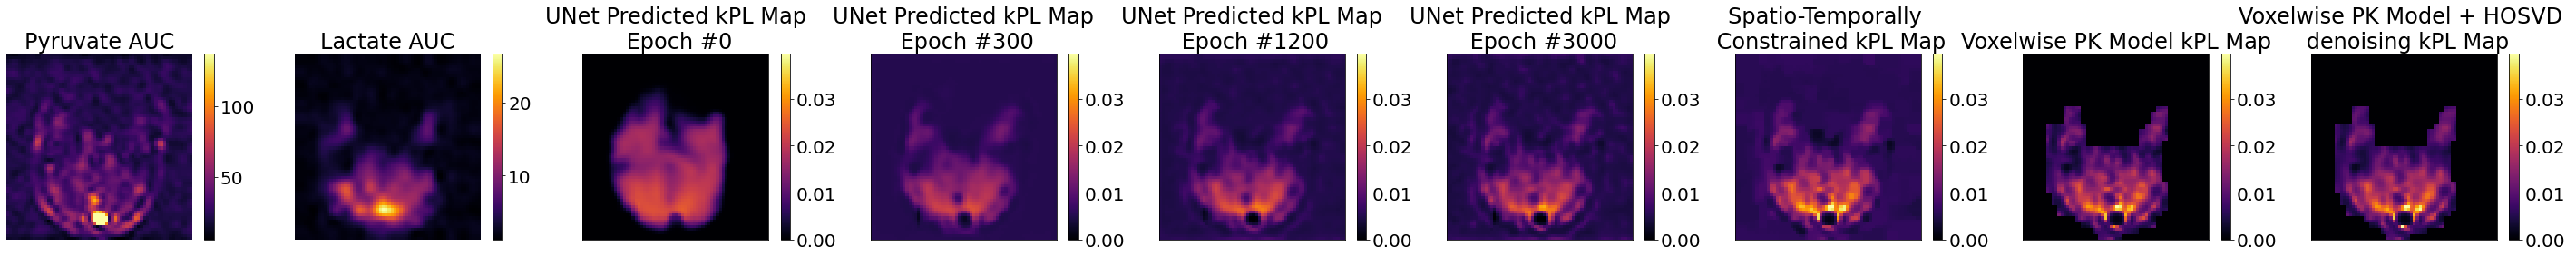

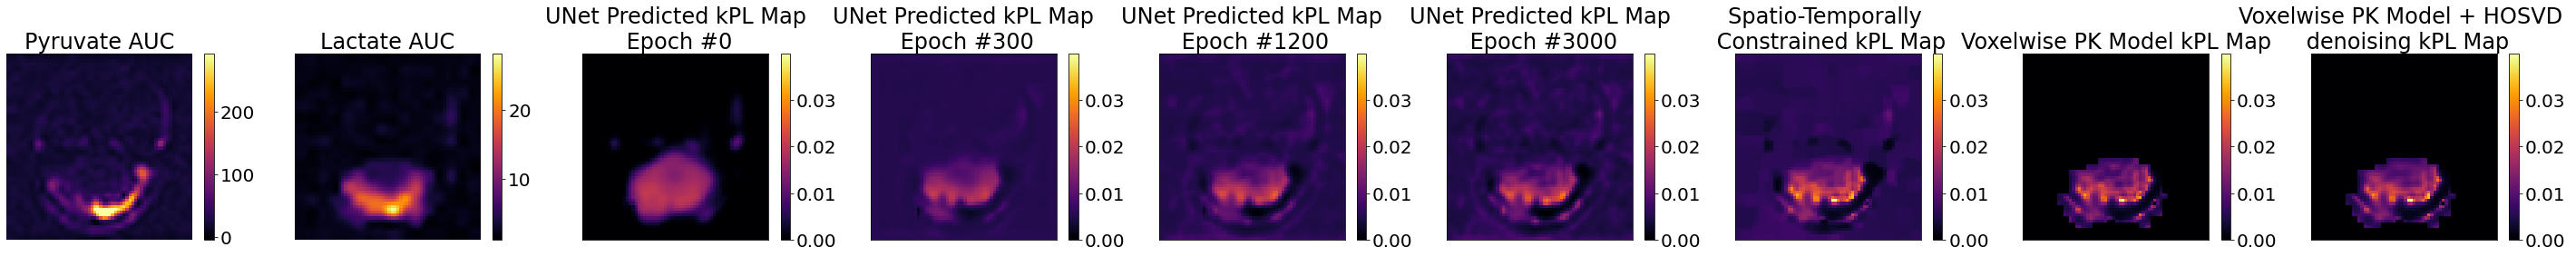

In [7]:
data_path_test = "/data/ssahin/kpl_dl_sim/brainweb_9_2/invivo_test/"
list_val = glob.glob(data_path_test + '/*.h5')
savepath = "/home/ssahin/kpl-est-dl/test_results/version_21/invivo_2/"

for im in list_val:
    dict = read_data_invivo(im)
    num = im.split("/")[-1].split(".")[0]

    x = torch.from_numpy(dict["data"])
    x = x[None, :, :, :]

    with torch.no_grad():
        kpl_pred = model(x)
    kpl_pred_np_model = np.squeeze(kpl_pred.numpy())
    
    with torch.no_grad():
        kpl_pred = model1(x)
    kpl_pred_np_model1 = np.squeeze(kpl_pred.numpy())

    with torch.no_grad():
        kpl_pred = model2(x)
    kpl_pred_np_model2 = np.squeeze(kpl_pred.numpy())

    with torch.no_grad():
        kpl_pred = model3(x)
    kpl_pred_np_model3 = np.squeeze(kpl_pred.numpy())

    plot_comp_invivo_multi(dict["data"], [kpl_pred_np_model, kpl_pred_np_model1, kpl_pred_np_model2, kpl_pred_np_model3], dict["kPL_const"], dict["kPL_PK"], dict["kPL_denoise_PK"], dict["mask"], epoch_num=[0,300,1200,3000], savepath = (savepath+num+".png"))
